##Домашняя Работа

Даже в большей степени, чем в случае с другими наборами данных, представленными на Kaggle, для составления долгосрочного исследования климатических тенденций требуется огромная очистка и подготовка данных. Первые данные собирались специалистами с помощью ртутных термометров, и любое изменение времени посещения влияло на результаты измерений. В 1940-х годах строительство аэропортов привело к перемещению многих метеостанций. В 1980-х годах произошел переход на электронные термометры, которые, как считается, имеют эффект охлаждения.

Учитывая эту сложность, существует ряд организаций, которые собирают данные о климатических тенденциях. Три наиболее цитируемых набора данных о температуре суши и океана — это MLOST (NOAA), GISTEMP (NASA) и HadCrut (Великобритания).

Мы перекомпоновали данные из новой подборки, собранной проектом Berkeley Earth, связанным с Национальной лабораторией имени Лоуренса в Беркли. Исследование температуры поверхности Земли в Беркли объединяет 1,6 миллиарда сообщений о температуре из 16 уже существующих архивов. Он хорошо упакован и позволяет разбивать данные на интересные подмножества (например, по странам). Они публикуют исходные данные и код для примененных преобразований. Они также используют методы, позволяющие включать метеорологические наблюдения из более коротких временных рядов, что позволяет отбрасывать меньше наблюдений.


## ЗАДАНИЕ 1


Подготовка данных.

Загрузите датасет GlobalLandTemperaturesByCountry.csv.

Выберите одну страну (например, Belarus или любую другую) и постройте временной ряд средних месячных температур. Убедитесь, что
индекс данных — это дата.

Загрузим датасет и посмотрим, что в нем

In [30]:
import pandas as pd

df = pd.read_csv("/content/GlobalLandTemperaturesByCountry.csv")

In [31]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


По условиям задания надо выбрать страну - пусть будет Молдова, поэтому сократим датасет до нее, но сперва посмотрим, какие вообще значения есть

In [32]:
print(df['Country'].unique())

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

Молдова так и называется, по сему сократим датасет до строк, где есть лишь Молдова

In [33]:
df = df[df['Country'] == 'Moldova']

In [34]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
340583,1743-11-01,3.415,2.809,Moldova
340584,1743-12-01,NaN,NaN,Moldova
340585,1744-01-01,NaN,NaN,Moldova
340586,1744-02-01,NaN,NaN,Moldova
340587,1744-03-01,NaN,NaN,Moldova


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 340583 to 343821
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3166 non-null   float64
 2   AverageTemperatureUncertainty  3166 non-null   float64
 3   Country                        3239 non-null   object 
dtypes: float64(2), object(2)
memory usage: 255.6+ KB


Колонка 'dt' у нас показывает дату, поэтому приведем ее тип к datetime

In [36]:
df['dt'] = pd.to_datetime(df['dt'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 340583 to 343821
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             3239 non-null   datetime64[ns]
 1   AverageTemperature             3166 non-null   float64       
 2   AverageTemperatureUncertainty  3166 non-null   float64       
 3   Country                        3239 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 255.6+ KB


Время к нужному формату привели,  теперь нужно сделать так, чтобы индексом данных — это дата.

In [38]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
dt,3239,1878-09-30 21:41:17.431305728,1743-11-01 00:00:00,1811-04-16 00:00:00,1878-10-01 00:00:00,1946-03-16 12:00:00,2013-09-01 00:00:00,NaN
AverageTemperature,3166.0,8.931717,-12.781,0.67875,9.2605,17.783,25.231,9.219115
AverageTemperatureUncertainty,3166.0,1.587095,0.078,0.363,0.7845,2.66875,9.731,1.634534


Есть мысль, что в задании подвох, потому что Молдова была когда-то частью Румынии, Российской Империи или СССР, поэтому посмотрим пропуски данных.

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

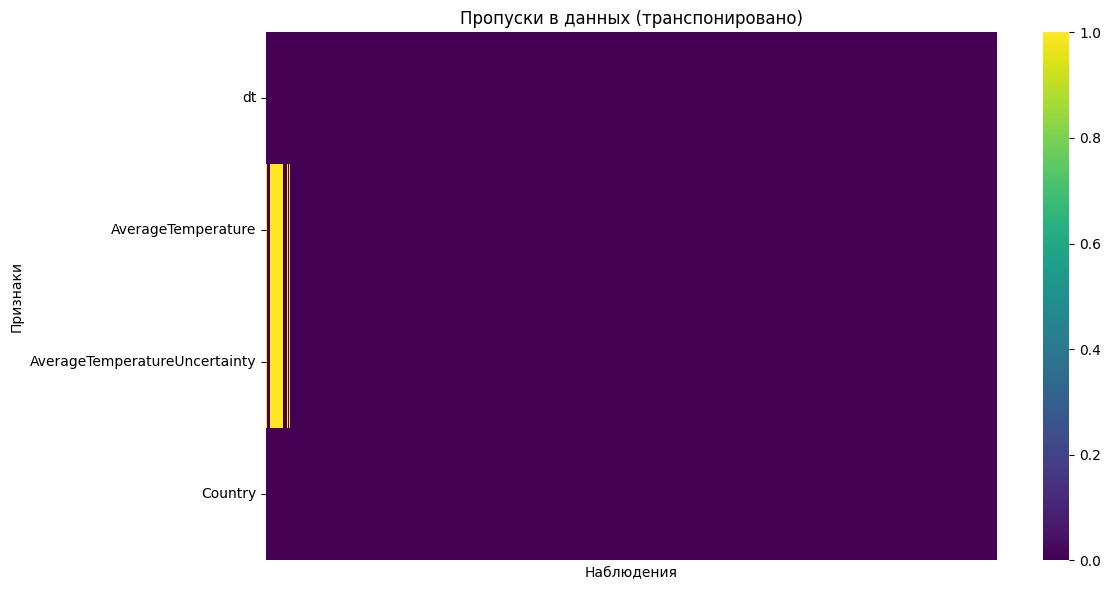

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.T.isnull(),
           cbar=True,
           cmap='viridis',
           yticklabels=True,
           xticklabels=False)
plt.title('Пропуски в данных (транспонировано)')
plt.xlabel('Наблюдения')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

Много пропусков в данных только в начале, поэтому давайте отбросим все данные до последнего пропуска и будем считать, что  без них (начнем отчет с нормальных данных)

In [41]:
df_nulls = df[df.isna() == True]

In [42]:
print(df_nulls)

        dt  AverageTemperature  AverageTemperatureUncertainty Country
340583 NaT                 NaN                            NaN     NaN
340584 NaT                 NaN                            NaN     NaN
340585 NaT                 NaN                            NaN     NaN
340586 NaT                 NaN                            NaN     NaN
340587 NaT                 NaN                            NaN     NaN
...     ..                 ...                            ...     ...
343817 NaT                 NaN                            NaN     NaN
343818 NaT                 NaN                            NaN     NaN
343819 NaT                 NaN                            NaN     NaN
343820 NaT                 NaN                            NaN     NaN
343821 NaT                 NaN                            NaN     NaN

[3239 rows x 4 columns]


In [43]:
df.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
343812,2012-12-01,-3.130,0.561,Moldova
343813,2013-01-01,-2.608,0.353,Moldova
343814,2013-02-01,1.133,0.246,Moldova
343815,2013-03-01,2.028,0.567,Moldova
343816,2013-04-01,11.560,0.552,Moldova
343817,2013-05-01,18.751,0.242,Moldova
343818,2013-06-01,21.189,0.317,Moldova
343819,2013-07-01,21.625,0.498,Moldova
343820,2013-08-01,22.006,0.165,Moldova
343821,2013-09-01,NaN,NaN,Moldova


In [44]:
df = df.dropna()

In [45]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
340583,1743-11-01,3.415,2.809,Moldova
340588,1744-04-01,11.264,3.040,Moldova
340589,1744-05-01,13.996,2.739,Moldova
340590,1744-06-01,18.303,2.715,Moldova
340591,1744-07-01,20.580,2.710,Moldova


In [46]:
df.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
343811,2012-11-01,6.005,0.423,Moldova
343812,2012-12-01,-3.130,0.561,Moldova
343813,2013-01-01,-2.608,0.353,Moldova
343814,2013-02-01,1.133,0.246,Moldova
343815,2013-03-01,2.028,0.567,Moldova
343816,2013-04-01,11.560,0.552,Moldova
343817,2013-05-01,18.751,0.242,Moldova
343818,2013-06-01,21.189,0.317,Moldova
343819,2013-07-01,21.625,0.498,Moldova
343820,2013-08-01,22.006,0.165,Moldova


In [47]:
df = df.set_index('dt')

In [48]:
print(df.index)

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='dt', length=3166, freq=None)


Итак, мы выбрали страну, преобразовали тип данных в колонке dt в datetime, сделали эту колонку индексом, убрали нулевые значения - осталось 3166 записей. Построим базовый график временного ряда

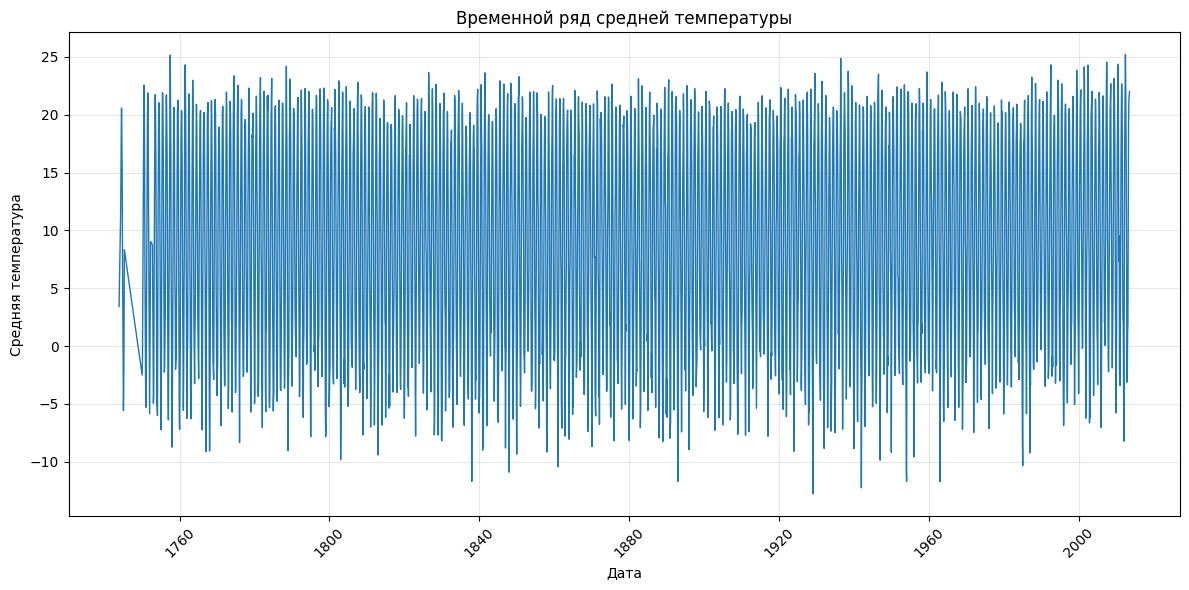

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AverageTemperature'], linewidth=1)
plt.title('Временной ряд средней температуры')
plt.xlabel('Дата')
plt.ylabel('Средняя температура')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,3.415,2.809,Moldova
1744-04-01,11.264,3.040,Moldova
1744-05-01,13.996,2.739,Moldova
1744-06-01,18.303,2.715,Moldova
1744-07-01,20.580,2.710,Moldova


Мне не нравится, что после  первой даты перерыв - сбросим ее

In [51]:
first_index = df.index[0]
df = df.drop(first_index)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1744-04-01,11.264,3.040,Moldova
1744-05-01,13.996,2.739,Moldova
1744-06-01,18.303,2.715,Moldova
1744-07-01,20.580,2.710,Moldova
1744-09-01,15.257,2.736,Moldova


## Задание 2

Holdout-разбиение.

Разделите временной ряд: первые 80% наблюдений оставьте для обучения, оставшиеся 20% — для теста.

Визуализируйте train/test на одном графике.

Размер train: 2532, размер test: 633


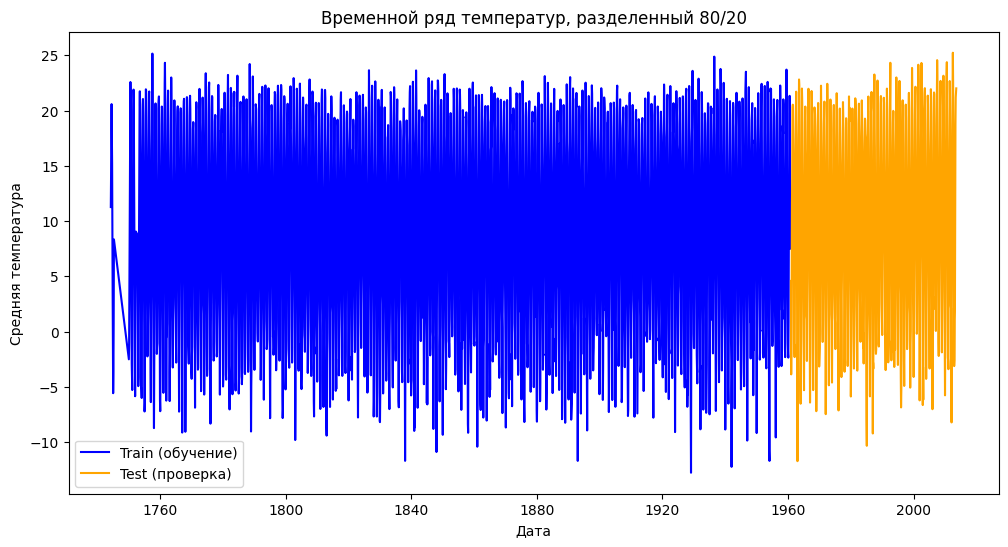

In [52]:
# Деление по времени
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Размер train: {len(train)}, размер test: {len(test)}")

plt.figure(figsize=(12,6))

# Train
plt.plot(train.index, train['AverageTemperature'], label='Train (обучение)', color='blue')

# Test
plt.plot(test.index, test['AverageTemperature'], label='Test (проверка)', color='orange')

# Оформление
plt.title("Временной ряд температур, разделенный 80/20")
plt.xlabel("Дата")
plt.ylabel("Средняя температура")
plt.legend()
plt.show()

## Задание 3

Скользящее окно.

Реализуйте rolling-window-разбиение: обучающие отрезки длиной 120 месяцев (10 лет) и прогнозный горизонт 12 месяцев. Визуализируйте хотя бы первые два сплита.

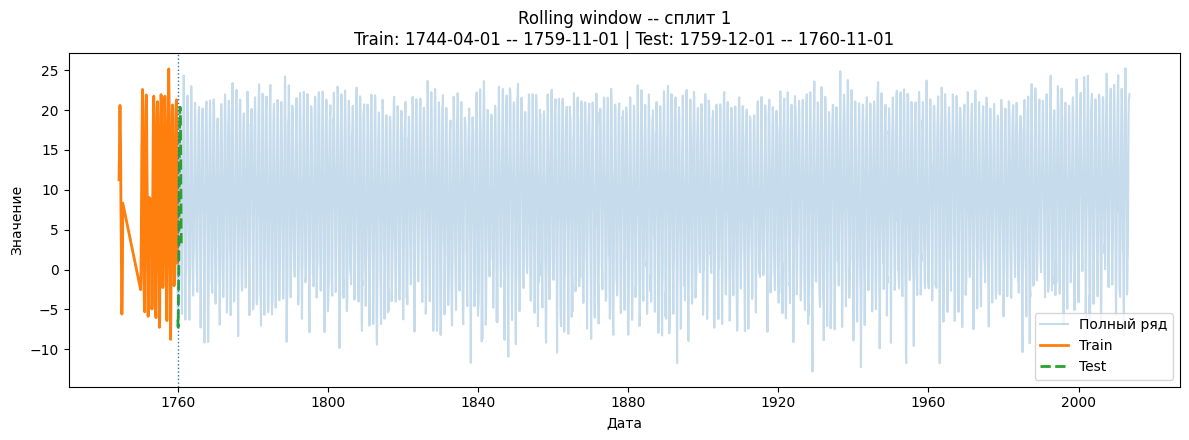

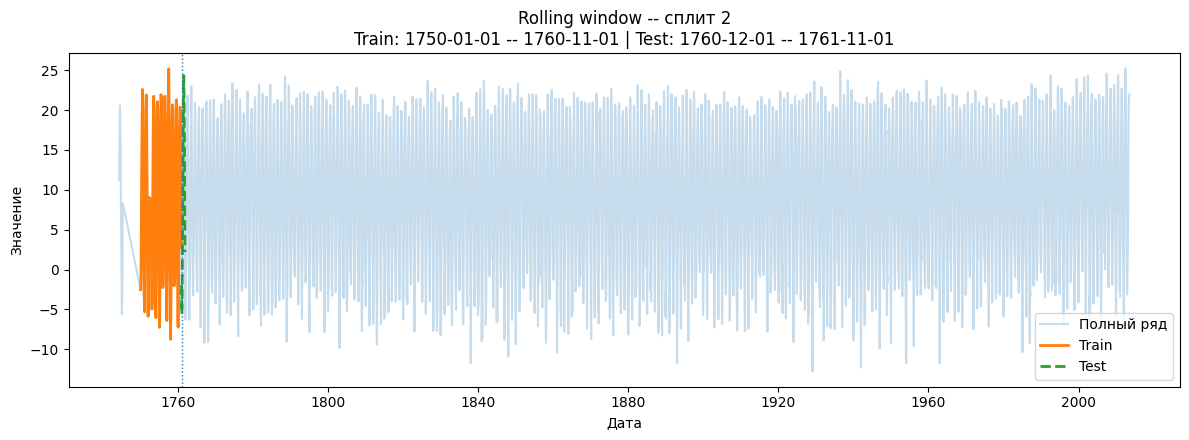

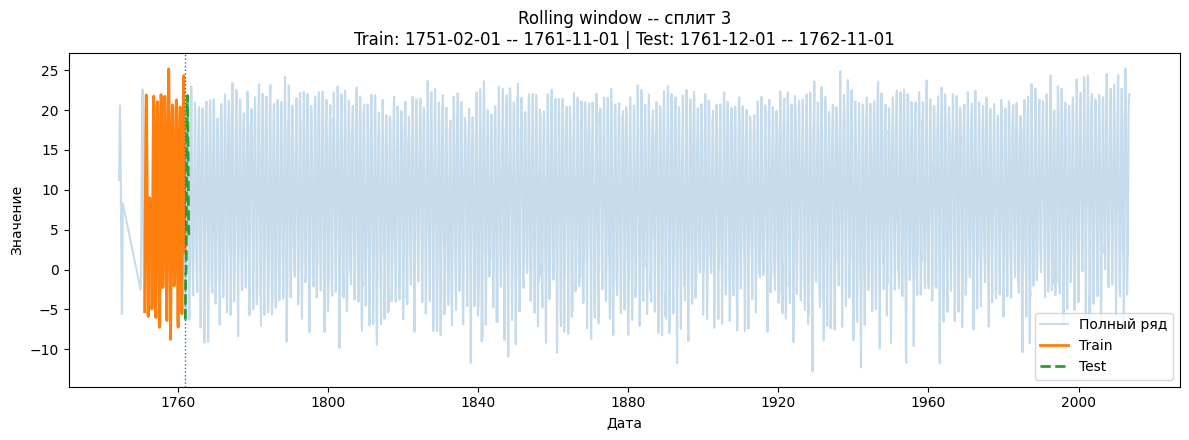

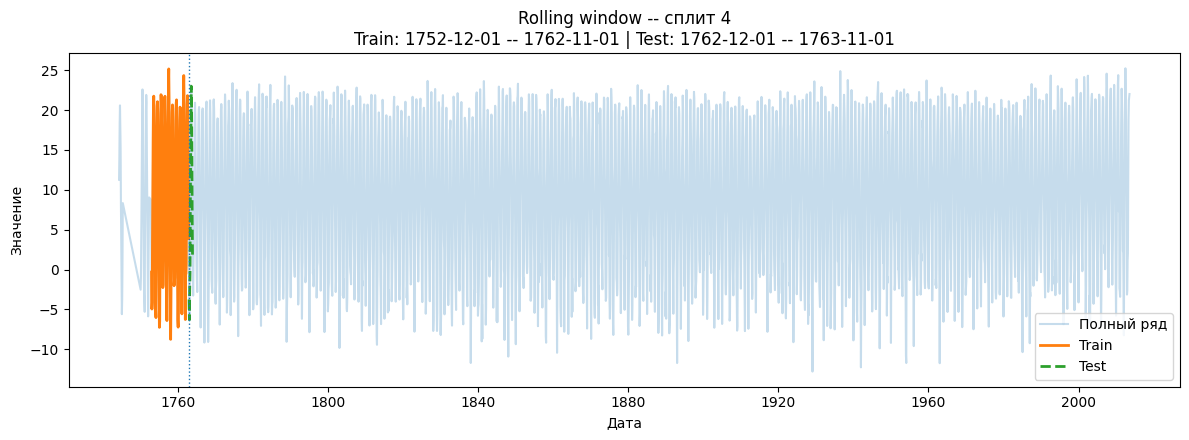

In [53]:

window_size = 120  # Месяцев для обучения
horizon = 12  	# Месяцев для прогноза

# Соберем окна
splits = []
for start in range(0, len(df) - window_size - horizon + 1, horizon):
	train_window = df.iloc[start:start+window_size]
	test_window = df.iloc[start+window_size:start+window_size+horizon]
	splits.append((train_window, test_window))

# Рисуем первые четыре сплита
for i, (train_window, test_window) in enumerate(splits[:4], start=1):
	plt.figure(figsize=(12, 4.5))

	# Весь ряд — фоном
	plt.plot(df.index, df['AverageTemperature'], alpha=0.25, label='Полный ряд')
	# Train
	plt.plot(train_window.index, train_window['AverageTemperature'], linewidth=2, label='Train')
	# Test
	plt.plot(test_window.index, test_window['AverageTemperature'], linewidth=2, linestyle='--', label='Test')
	# Вертикальная линия-раздел
	plt.axvline(test_window.index[0], linestyle=':', linewidth=1)

	plt.title(f'Rolling window -- сплит {i}\n'
          	f'Train: {train_window.index[0].date()} -- {train_window.index[-1].date()} | '
          	f'Test: {test_window.index[0].date()} -- {test_window.index[-1].date()}')
	plt.xlabel('Дата')
	plt.ylabel('Значение')
	plt.legend()
	plt.tight_layout()
	plt.show()

## Задание 4

Генерация признаков.

Для временного ряда создайте лаги (например, на 1 и 12 месяцев) и календарные признаки: номер месяца и индикатор зимнего сезона (декабрь — февраль).

Покажите первые строки получившегося датафрейма.

In [54]:
df['lag_1'] =df['AverageTemperature'].shift(1)
df['lag_12'] =df['AverageTemperature'].shift(12)
df['month_number'] = df.index.month
df['is_winter'] = df['month_number'].isin([12, 1, 2]).astype(int)

In [55]:
print("Первые 15 строк датафрейма с новыми признаками:")
print(df.head(15))

Первые 15 строк датафрейма с новыми признаками:
            AverageTemperature  AverageTemperatureUncertainty  Country  \
dt                                                                       
1744-04-01              11.264                          3.040  Moldova   
1744-05-01              13.996                          2.739  Moldova   
1744-06-01              18.303                          2.715  Moldova   
1744-07-01              20.580                          2.710  Moldova   
1744-09-01              15.257                          2.736  Moldova   
1744-10-01               8.176                          2.778  Moldova   
1744-11-01               3.687                          2.702  Moldova   
1744-12-01              -1.869                          2.801  Moldova   
1745-01-01              -5.584                          2.772  Moldova   
1745-02-01              -3.593                          2.721  Moldova   
1745-03-01               0.603                          2.668  M

## Задание 5

Оценка прогноза.

Постройте простую модель (например, линейную регрессию, где целевая переменная — температура, а признаки — лаги и дата-фичи).

Сделайте прогноз на тестовой выборке из holdout-разбиения.

Посчитайте метрики MAE, RMSE и MAPE.

In [56]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Создаем временный DataFrame с нужными колонками
temp_df = df[['AverageTemperature', 'lag_1', 'lag_12', 'month_number', 'is_winter']].copy()

# Удаляем строки с пропусками
temp_df = temp_df.dropna()

# Поскольку датасет с новыми колонками, то делаем новое разделение
train_size = int(len(temp_df) * 0.8)
train, test = temp_df.iloc[:train_size], temp_df.iloc[train_size:]

print(f"Размер train: {len(train)}, размер test: {len(test)}")

# Обучаем модель на трейне, как в холдаут выборке
X_train = sm.add_constant(train[['lag_1', 'lag_12', 'month_number', 'is_winter']])
y_train = train["AverageTemperature"]

model = sm.OLS(y_train, X_train).fit()

# Прогнозируем на тесте, как в холдаут выборке
X_test = sm.add_constant(test[['lag_1', 'lag_12', 'month_number', 'is_winter']])
y_test = test["AverageTemperature"]
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Метрики качества модели на ТЕСТОВОЙ ВЫБОРКЕ:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("\n" + "="*50)
print(model.summary())


Размер train: 2522, размер test: 631
Метрики качества модели на ТЕСТОВОЙ ВЫБОРКЕ:
MAE: 1.87
RMSE: 2.46
MAPE: 158.18%

                            OLS Regression Results                            
Dep. Variable:     AverageTemperature   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6943.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:43:46   Log-Likelihood:                -6058.0
No. Observations:                2522   AIC:                         1.213e+04
Df Residuals:                    2517   BIC:                         1.216e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------

Для красоты построим графики

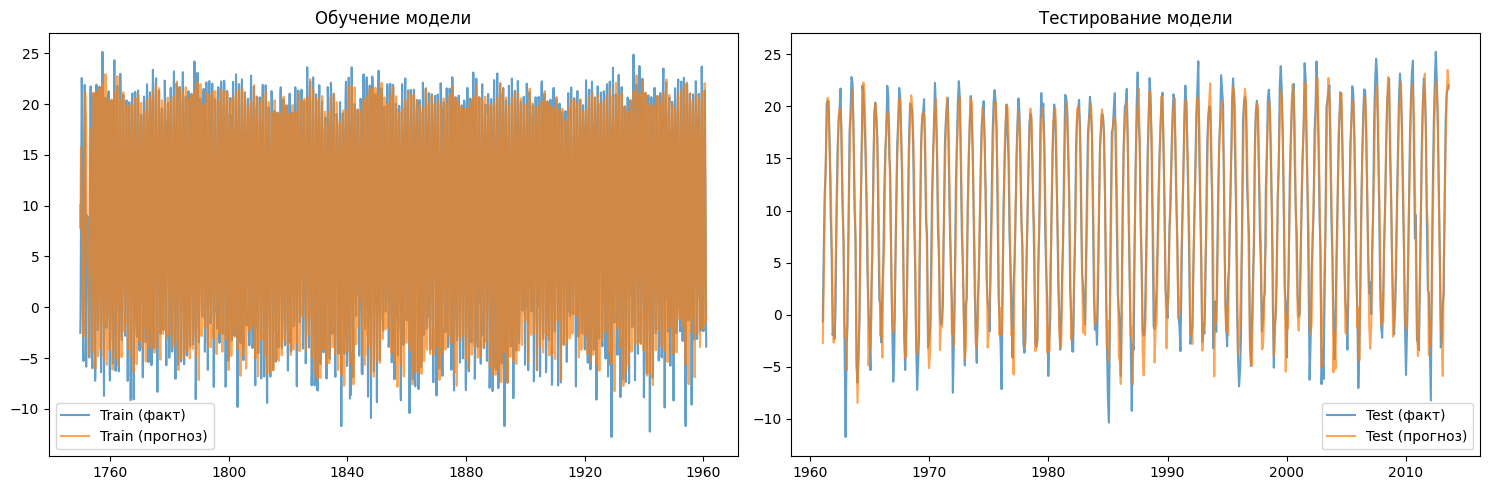


Даты в train: 1750-01-01 00:00:00 - 1961-01-01 00:00:00
Даты в test: 1961-02-01 00:00:00 - 2013-08-01 00:00:00


In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label='Train (факт)', alpha=0.7)
plt.plot(train.index, model.predict(X_train), label='Train (прогноз)', alpha=0.7)
plt.title('Обучение модели')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label='Test (факт)', alpha=0.7)
plt.plot(test.index, y_pred, label='Test (прогноз)', alpha=0.7)
plt.title('Тестирование модели')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nДаты в train: {train.index[0]} - {train.index[-1]}")
print(f"Даты в test: {test.index[0]} - {test.index[-1]}")